In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

First, convert json dictionaries into a pd.DataFrame, and analyse the DataFrame

In [2]:
with open("../data/Video_Games_5.json") as f:
    data = ndjson.load(f)

In [4]:
reviews_df = pd.DataFrame(data)

In [5]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


In [8]:
reviews_df.shape

(497577, 12)

In [10]:
reviews_df.describe()

,overall,unixReviewTime
count,497577.000000,4.975770e+05
mean,4.220456,1.367848e+09
std,1.185424,1.224113e+08
min,1.000000,9.398592e+08
25%,4.000000,1.316563e+09
50%,5.000000,1.410221e+09
75%,5.000000,1.452384e+09
max,5.000000,1.538438e+09


<Axes: xlabel='overall', ylabel='count'>

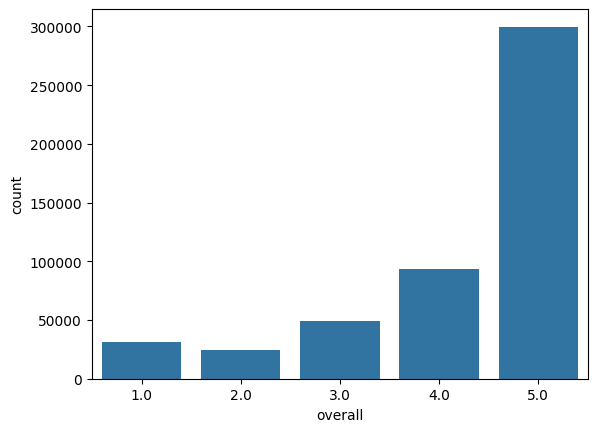

In [9]:
sns.countplot(data = reviews_df, x="overall")

The distribution of scores indicates that a majority of scores are full marks (5.0). Median scores indicate that over 50% of scores are 5.0, and over 75% of scores are 4.0.

However, number of reviews for each score are very high, meaning that we have sufficient sample size to undersample. Undersampling mitigates imbalance of classes (scores), preventing our model from overfitting to one class and bias towards learning patterns from the dominant class exclusively

In [11]:
unique_scores = [1.0, 2.0, 3.0, 4.0, 5.0]
large_sample = [1.0, 5.0]
undersamples = []
for score in unique_scores:
    if score in large_sample:
        undersamples.append(reviews_df[reviews_df["overall"] == score].sample(n=1500))
    else:
        undersamples.append(reviews_df[reviews_df["overall"] == score].sample(n=500))
undersampled_reviews = pd.concat(undersamples)

<Axes: xlabel='overall', ylabel='count'>

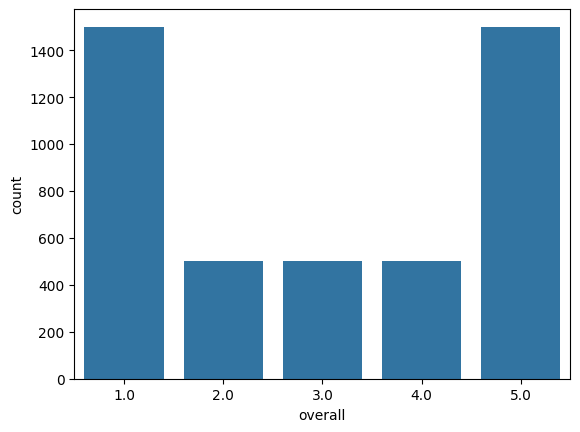

In [12]:
sns.countplot(data = undersampled_reviews, x="overall")

We save two corpuses for analysis, the smaller balanced corpus, and a large corpus (100000 reviews):

In [ ]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)
undersampled_reviews.to_csv("../data/small_corpus.csv", index=False)
sample_100K_revs.to_csv("../data/big_corpus.csv", index=False)